# Roteiro:

1. Descrição dos atributos
2. Estruturação dos dados
3. Análise Exploratória
4. Aspectos específicos da campanha

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("bank.csv")

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

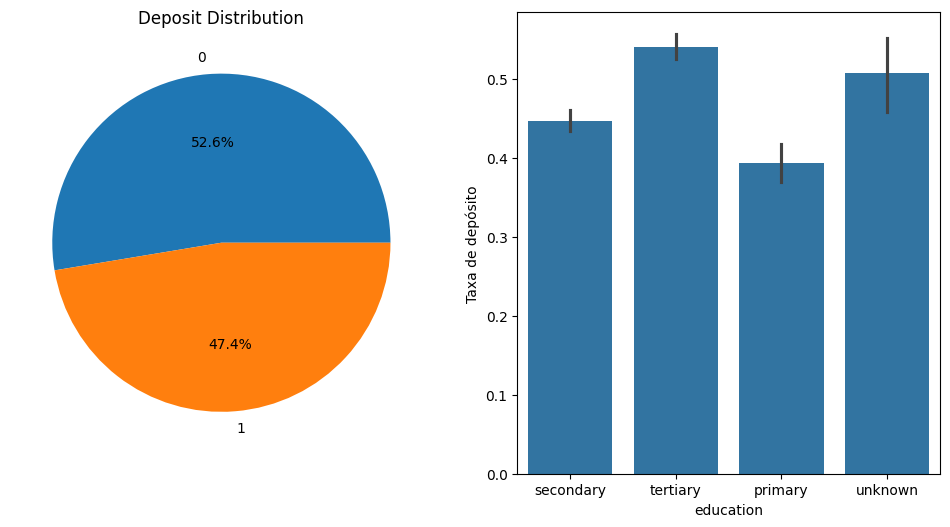

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['deposit'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], title='Deposit Distribution')

ax[0].set_ylabel('')

sns.barplot(x='education', y='deposit', data=df, ax=ax[1])

ax[1].set_ylabel('Taxa de depósito')

plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_14328\616737518.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)


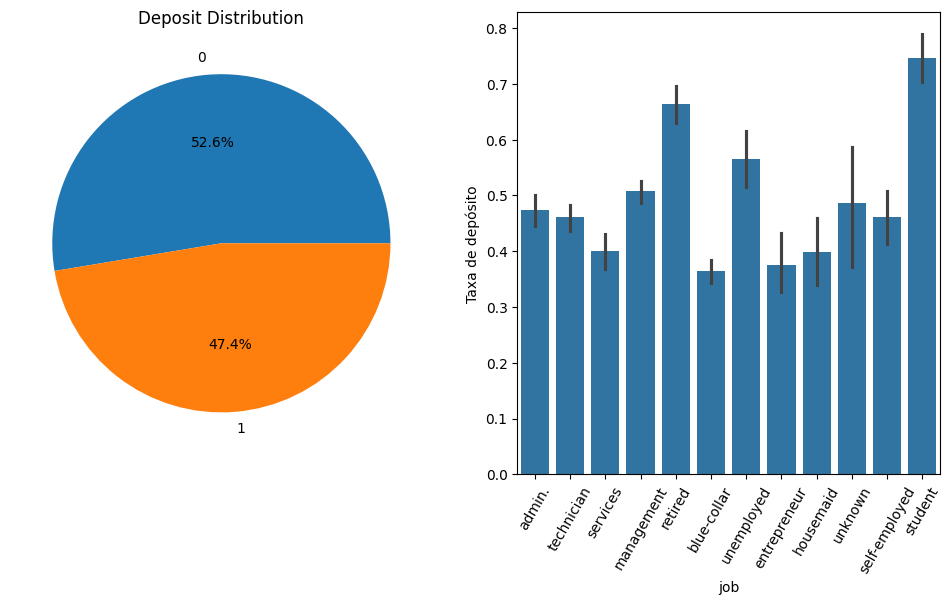

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df['deposit'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], title='Deposit Distribution')

ax[0].set_ylabel('')

sns.barplot(x='job', y='deposit', data=df, ax=ax[1])

ax[1].set_ylabel('Taxa de depósito')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_14328\920659838.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


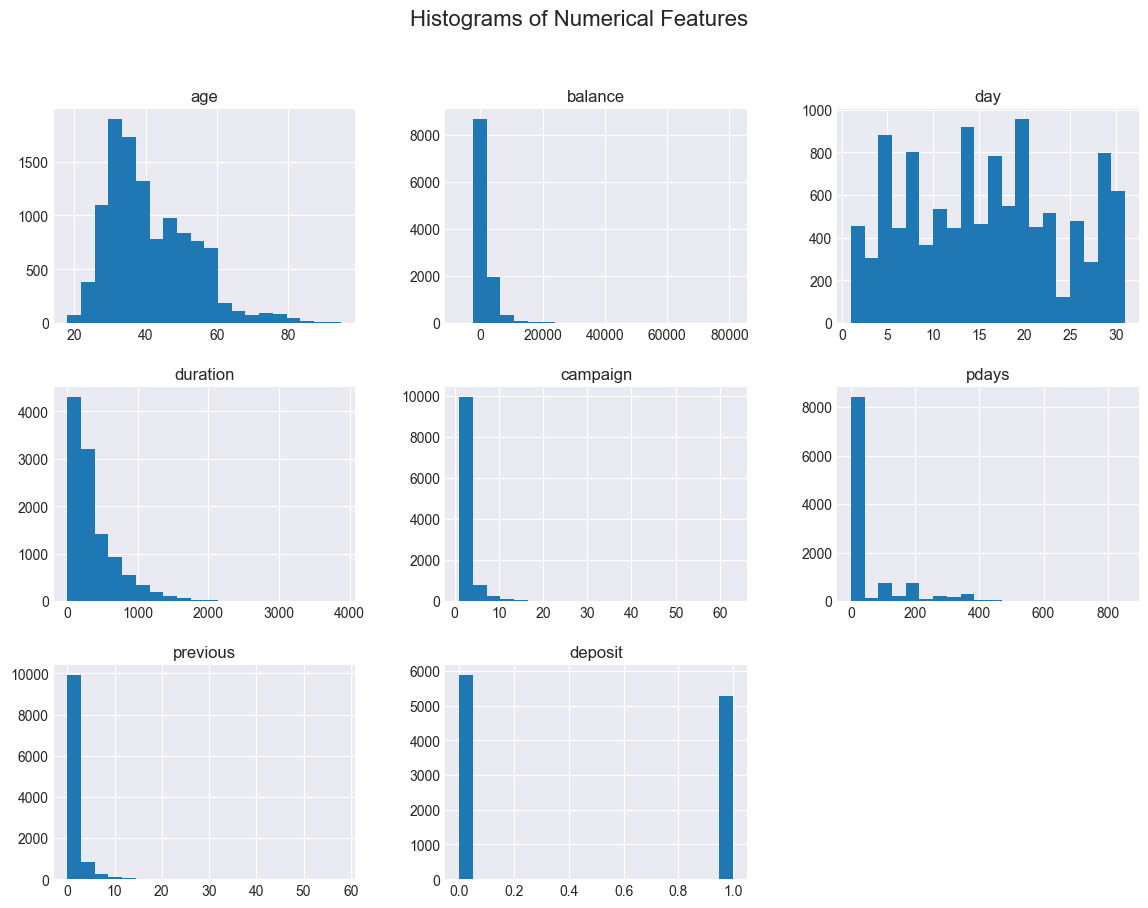

In [14]:
plt.style.use('seaborn-darkgrid')

df.hist(bins=20, figsize=(14,10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

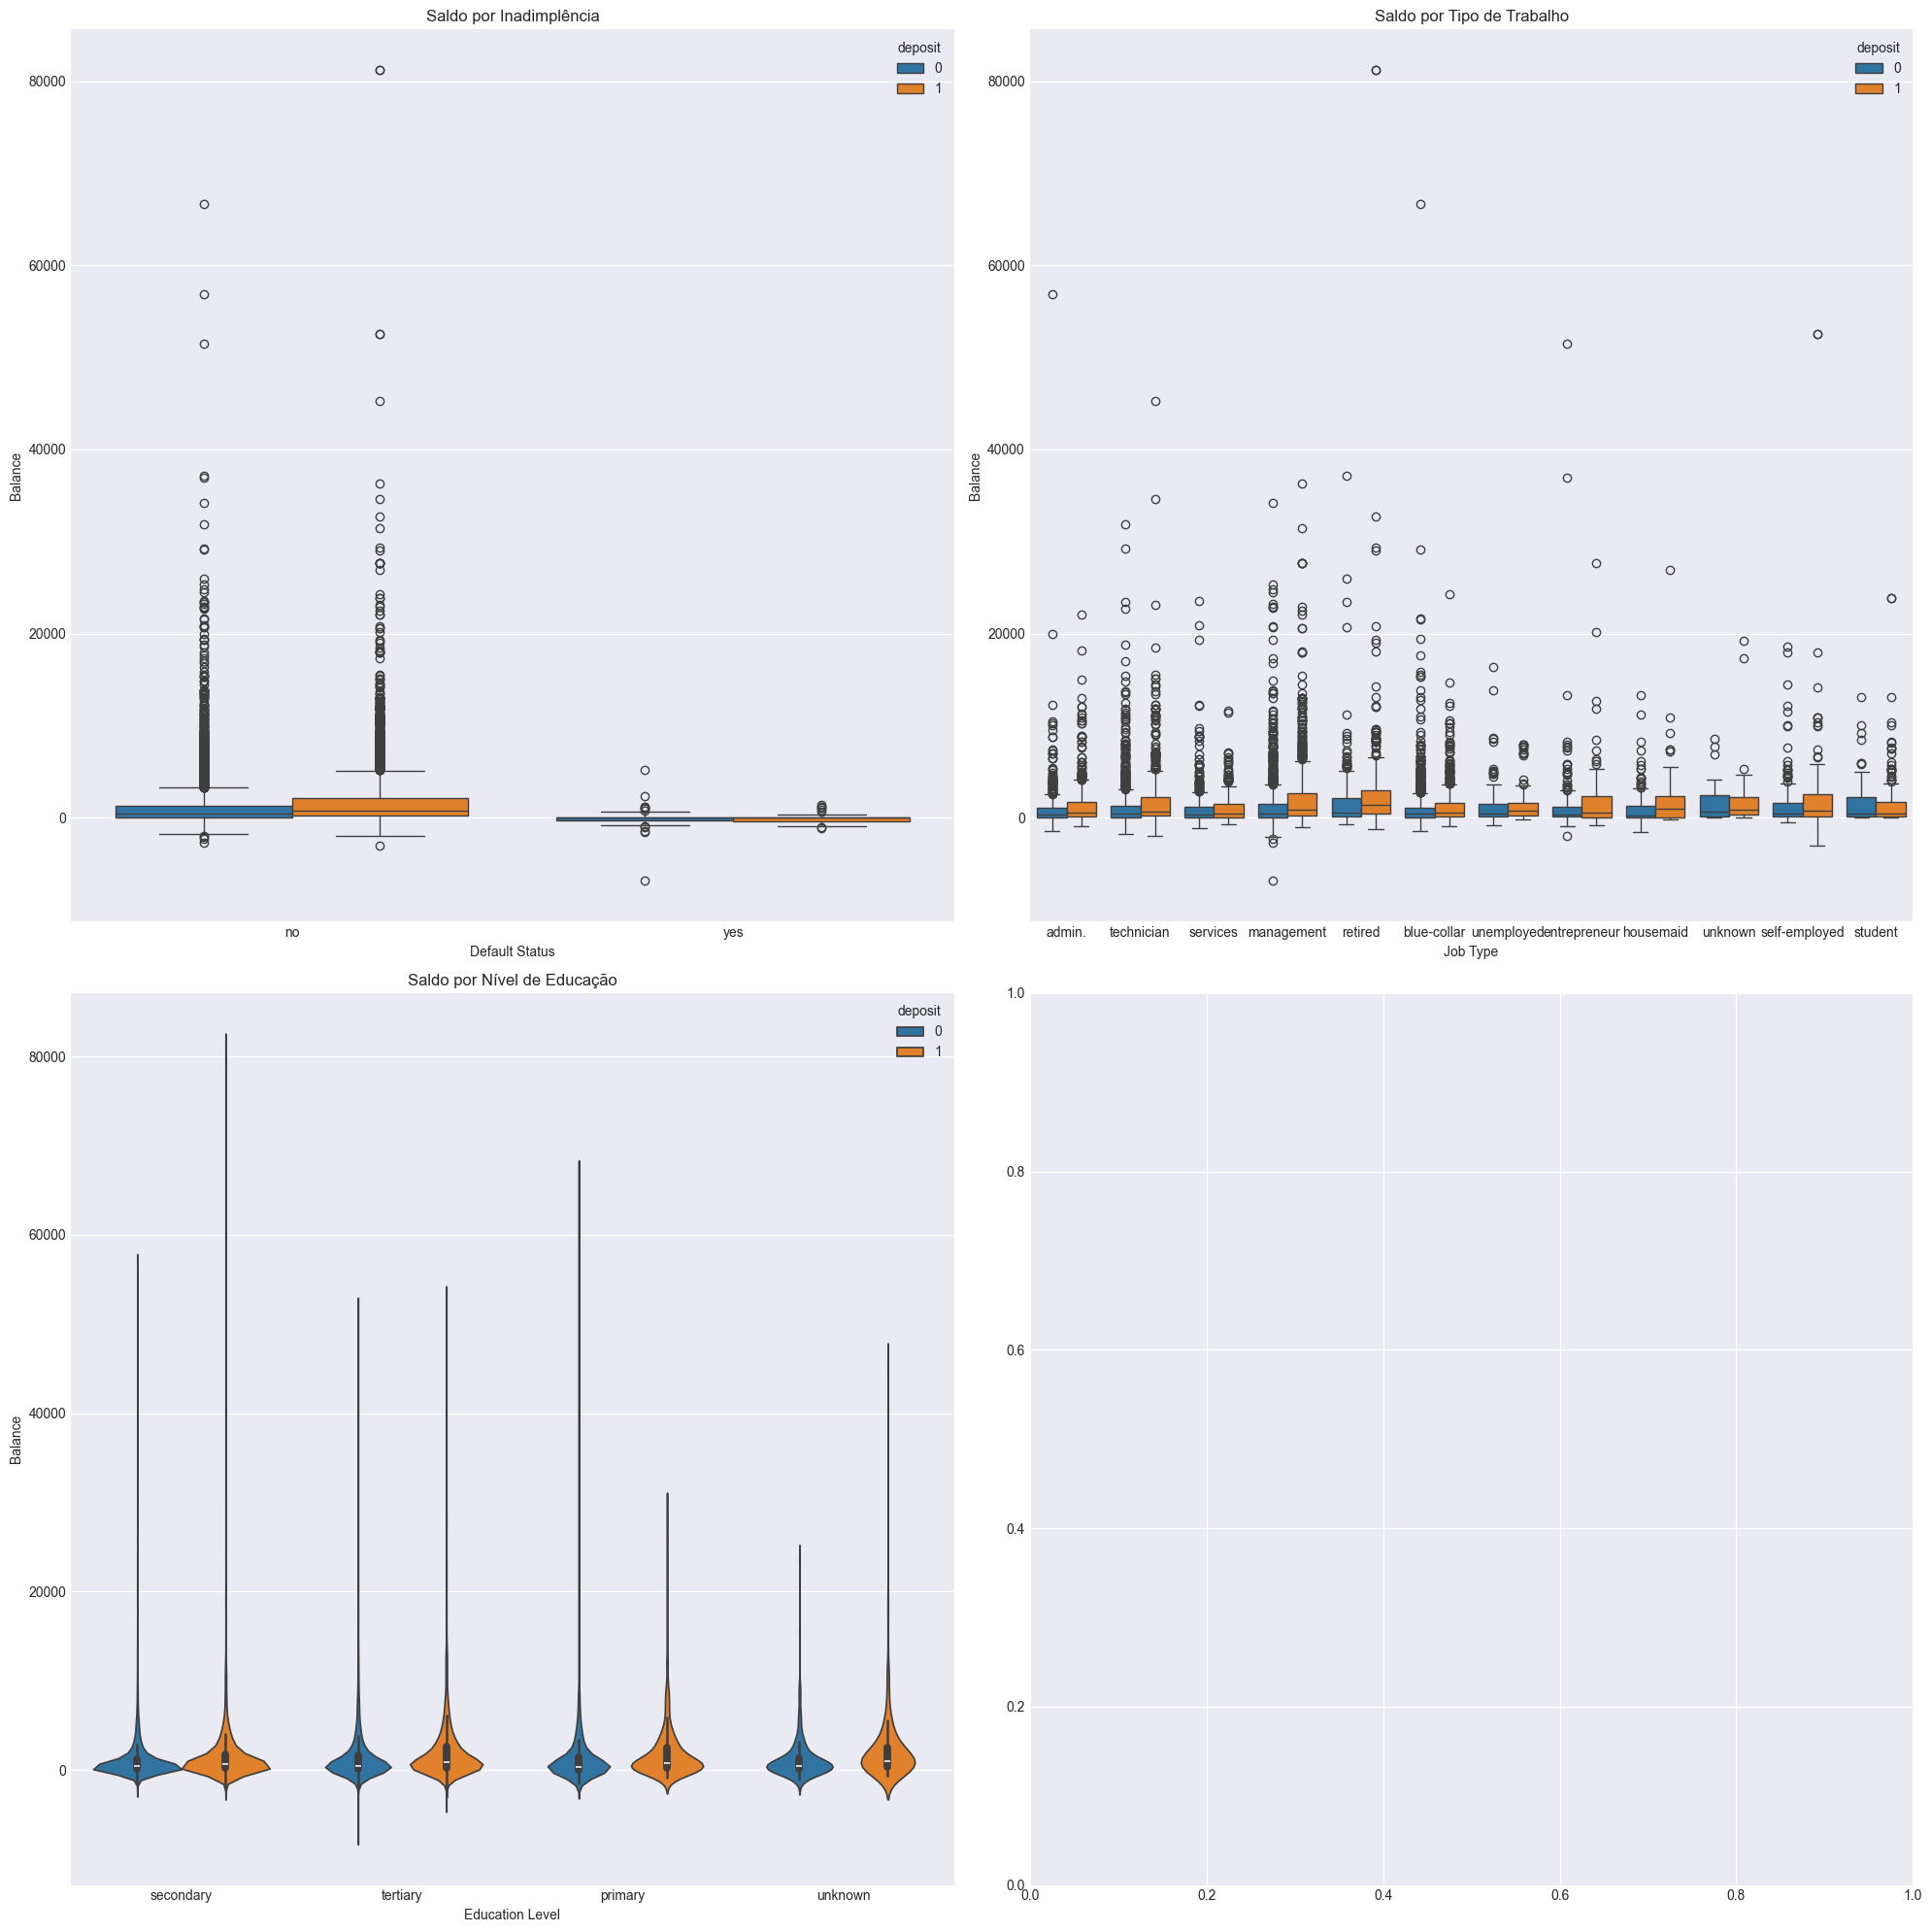

In [16]:
fig, axes = plt.subplots(2,2, figsize=(20,20))
ax1, ax2, ax3 = axes[0,0], axes[0,1], axes[1,0]

sns.boxplot(x='default', y='balance', hue='deposit', data=df, ax=ax1)

ax1.set( title='Saldo por Inadimplência', ylabel='Balance', xlabel='Default Status' )

sns.boxplot(x='job', y='balance', hue='deposit', data=df, ax=ax2)

ax2.set( title='Saldo por Tipo de Trabalho', ylabel='Balance', xlabel='Job Type' )

sns.violinplot(data=df, x='education', y='balance', hue='deposit', ax=ax3)

ax3.set( title='Saldo por Nível de Educação', ylabel='Balance', xlabel='Education Level' )
plt.tight_layout()  
plt.show()